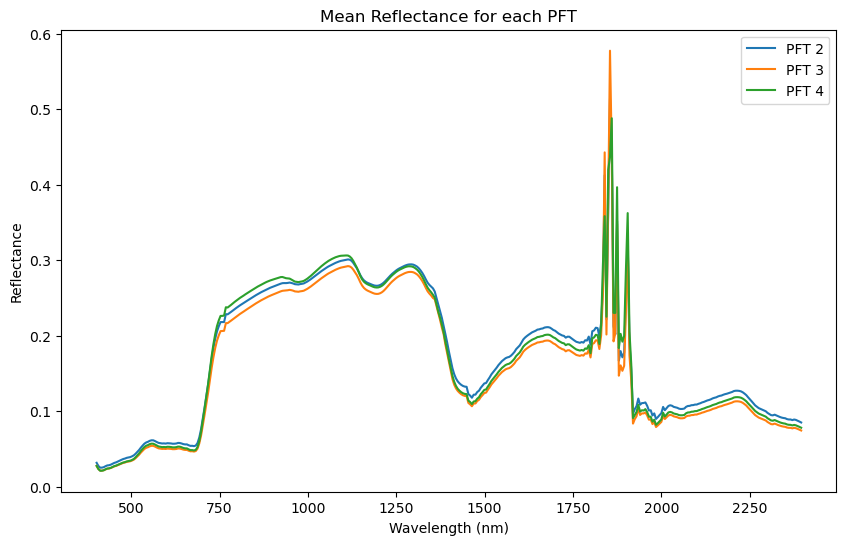

In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
pft_ds = xr.open_dataset('/net/fluo/data3/data/FluoData1/students/renato/aviris_dangermond/California_Vegetation_WHRTYPE_Dangermond/output_latlon.nc')
dat = xr.open_dataset('/net/fluo/data3/data/FluoData1/students/renato/aviris_dangermond/aviris_dangermond_time_00/output_clipped_reduced.nc')


# Define PFT indices
pft_indices = [2, 3, 4]

# Initialize a figure
plt.figure(figsize=(10, 6))

# Loop over each PFT index to mask and calculate the mean reflectance
for pft_index in pft_indices:
    # Create the mask for the current PFT
    pft_mask = pft_ds['Band1'].values == pft_index
    
    # Apply the mask directly to the hyperspectral data for each wavelength
    pft_reflectance = np.where(pft_mask, dat['reflectance'].values, np.nan)
    
    # Compute the mean reflectance while ignoring NaNs
    mean_reflectance = np.nanmean(pft_reflectance, axis=(0, 2, 3))  # Assuming time, lat, lon are the second, third and fourth dimensions respectively
    
    # Plot the mean reflectance
    plt.plot(dat['wavelength'].values, mean_reflectance, label=f'PFT {pft_index}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Mean Reflectance for each PFT')
plt.legend()
plt.show()


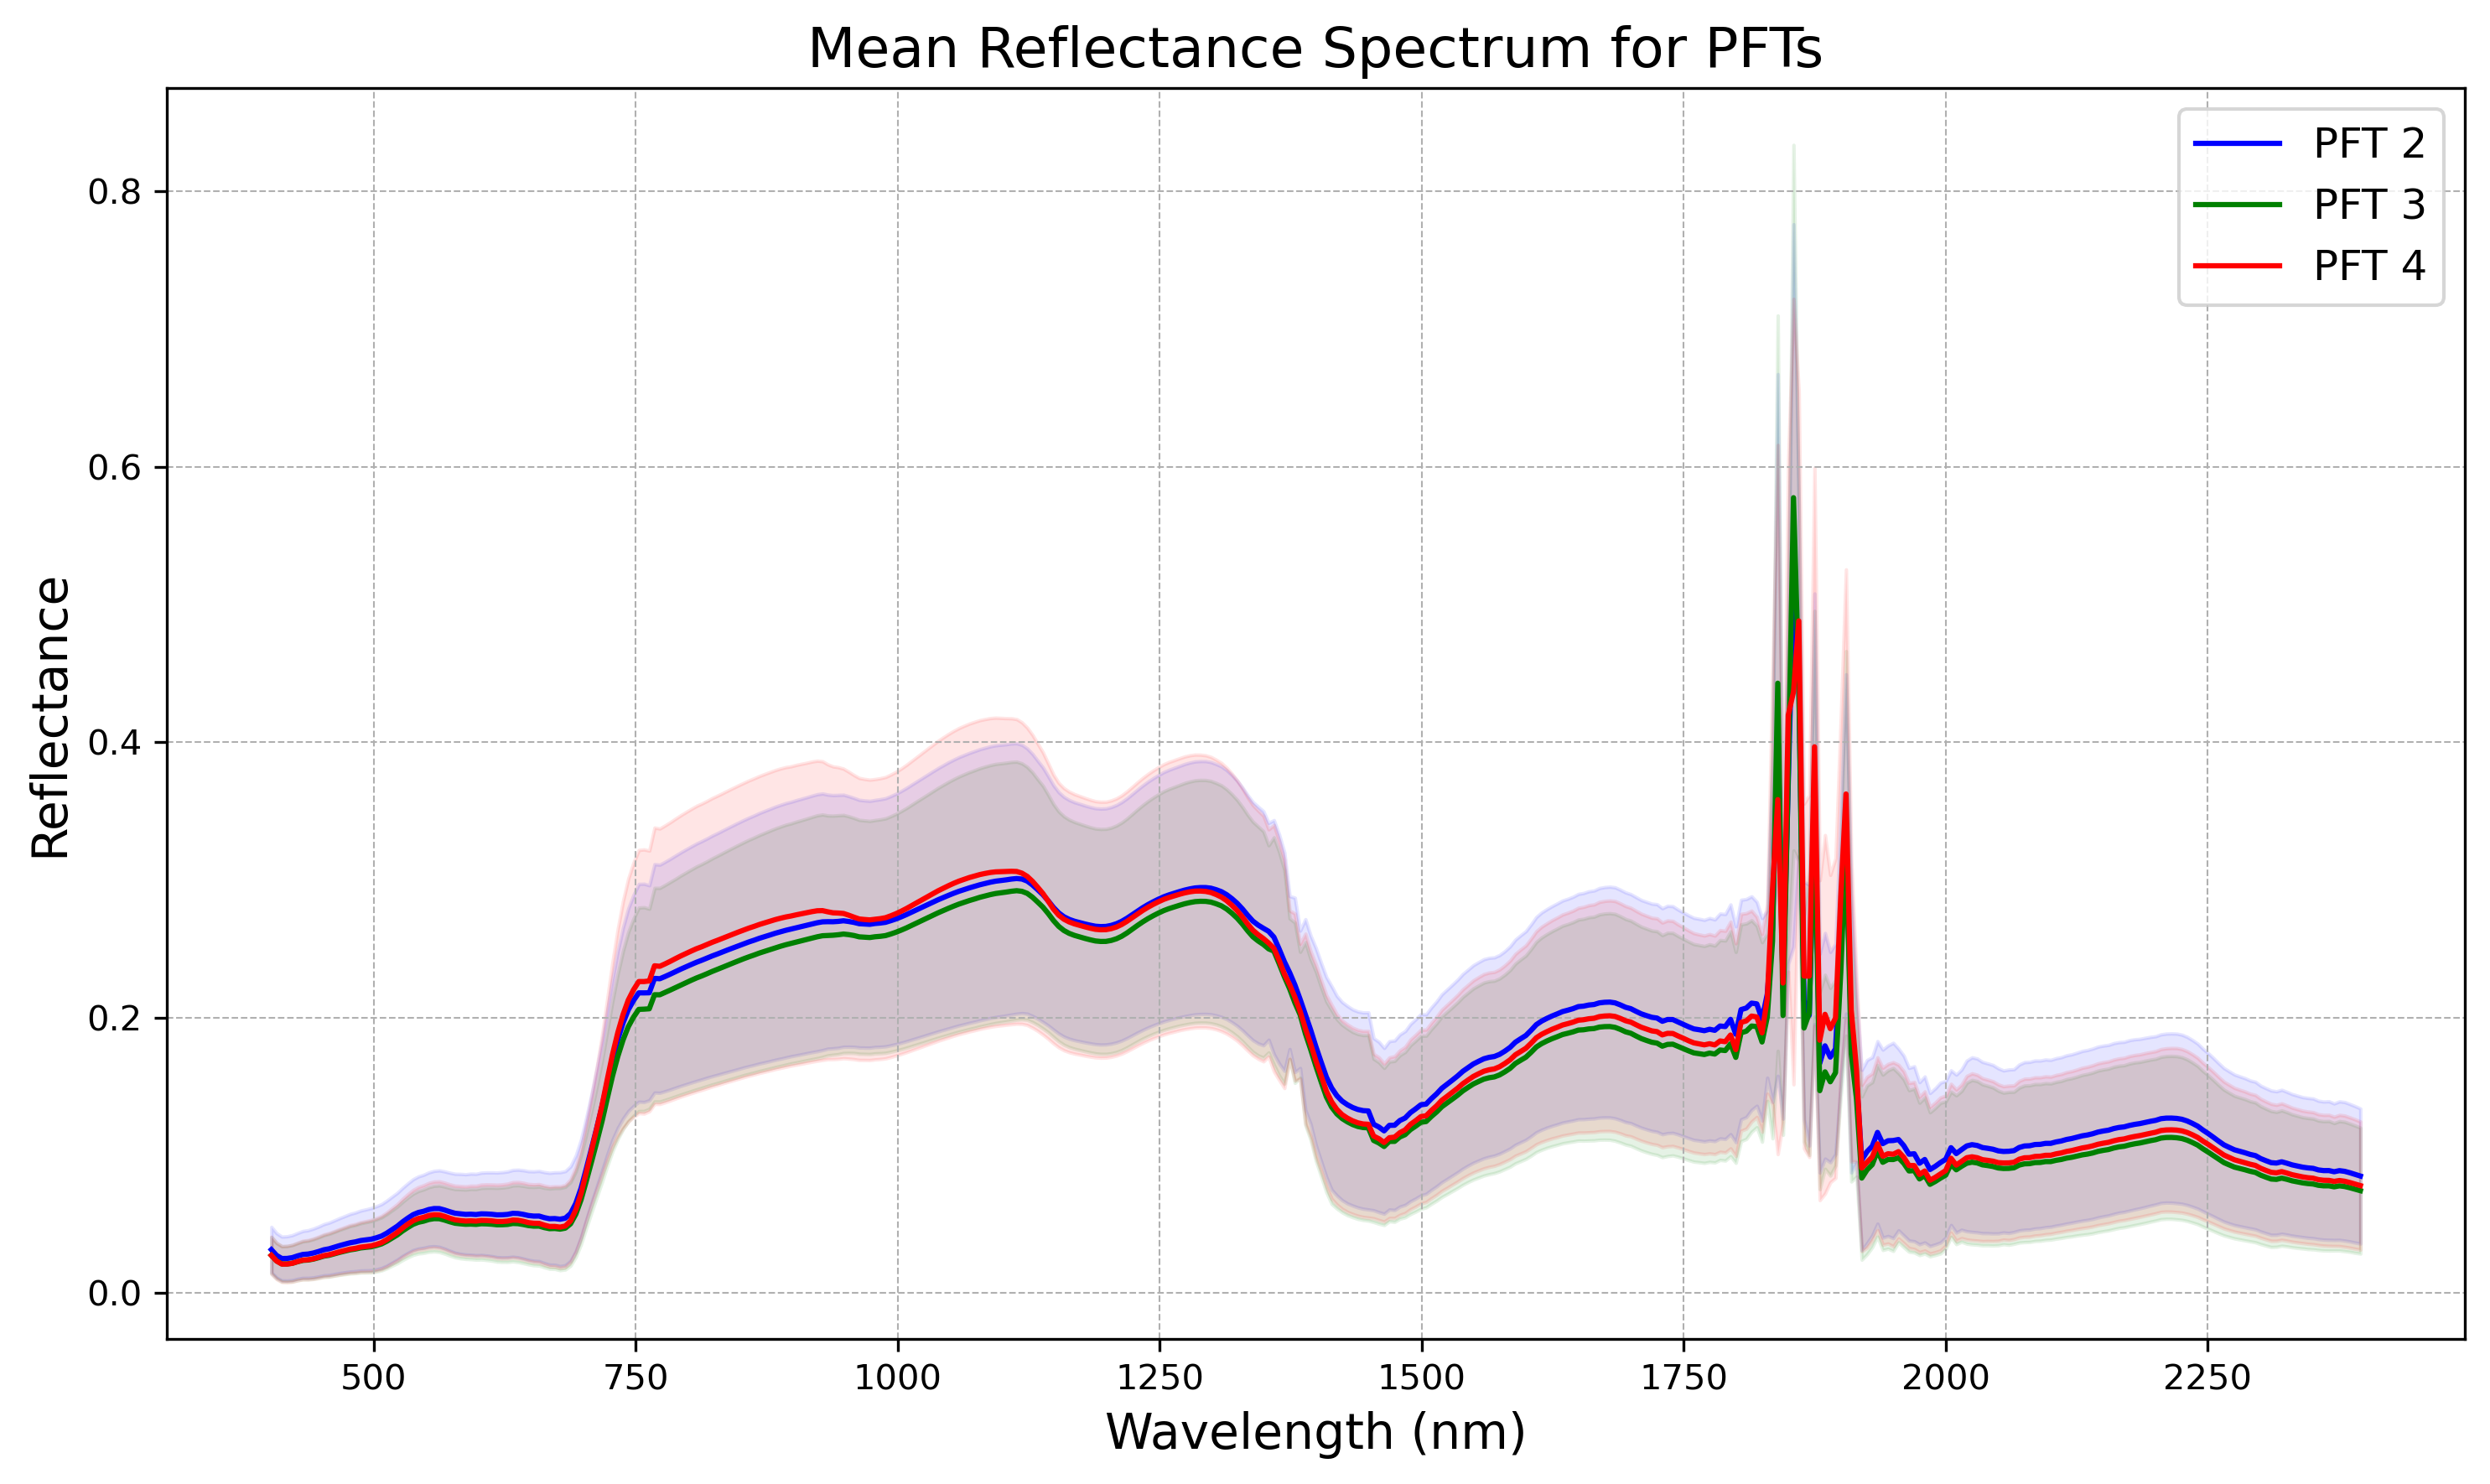

In [15]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the datasets
pft_ds = xr.open_dataset('/net/fluo/data3/data/FluoData1/students/renato/aviris_dangermond/California_Vegetation_WHRTYPE_Dangermond/output_latlon.nc')
dat = xr.open_dataset('/net/fluo/data3/data/FluoData1/students/renato/aviris_dangermond/aviris_dangermond_time_00/output_clipped_reduced.nc')


# Define PFT indices
pft_indices = [2, 3, 4]
colors = ['blue', 'green', 'red']  # Colors for each PFT
labels = ['PFT 2', 'PFT 3', 'PFT 4']  # Labels for each PFT

# Initialize a high-resolution figure
plt.figure(figsize=(10, 6), dpi=300)

# Loop over each PFT index to mask, calculate the mean reflectance, and the confidence intervals
for pft_index, color, label in zip(pft_indices, colors, labels):
    # Create the mask for the current PFT
    pft_mask = pft_ds['Band1'].values == pft_index
    
    # Apply the mask directly to the hyperspectral data for each wavelength
    pft_reflectance = np.where(pft_mask, dat['reflectance'].values, np.nan)
    
    # Compute the mean reflectance while ignoring NaNs
    mean_reflectance = np.nanmean(pft_reflectance, axis=(0, 2, 3))  # Adjust axes if your data dimensions differ
    
    # Compute the standard deviation and the 95% confidence interval
    std_deviation = np.nanstd(pft_reflectance, axis=(0, 2, 3))
    #ci95 = 1.96 * std_deviation / np.sqrt(np.sum(~np.isnan(pft_reflectance), axis=(0, 2, 3)))
    ci95 = std_deviation 
    # Plot the mean reflectance and the confidence interval shading
    wavelengths = dat['wavelength'].values
    plt.plot(wavelengths, mean_reflectance, label=label, color=color)
    plt.fill_between(wavelengths, mean_reflectance - ci95, mean_reflectance + ci95, color=color, alpha=0.1)

# Formatting the plot to be publication-quality
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('Reflectance', fontsize=14)
plt.title('Mean Reflectance Spectrum for PFTs', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', ls='--', lw=0.5)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()

# Save the plot with high resolution
#plt.savefig('/path/to/save/publication_quality_plot.png', dpi=300)
plt.show()


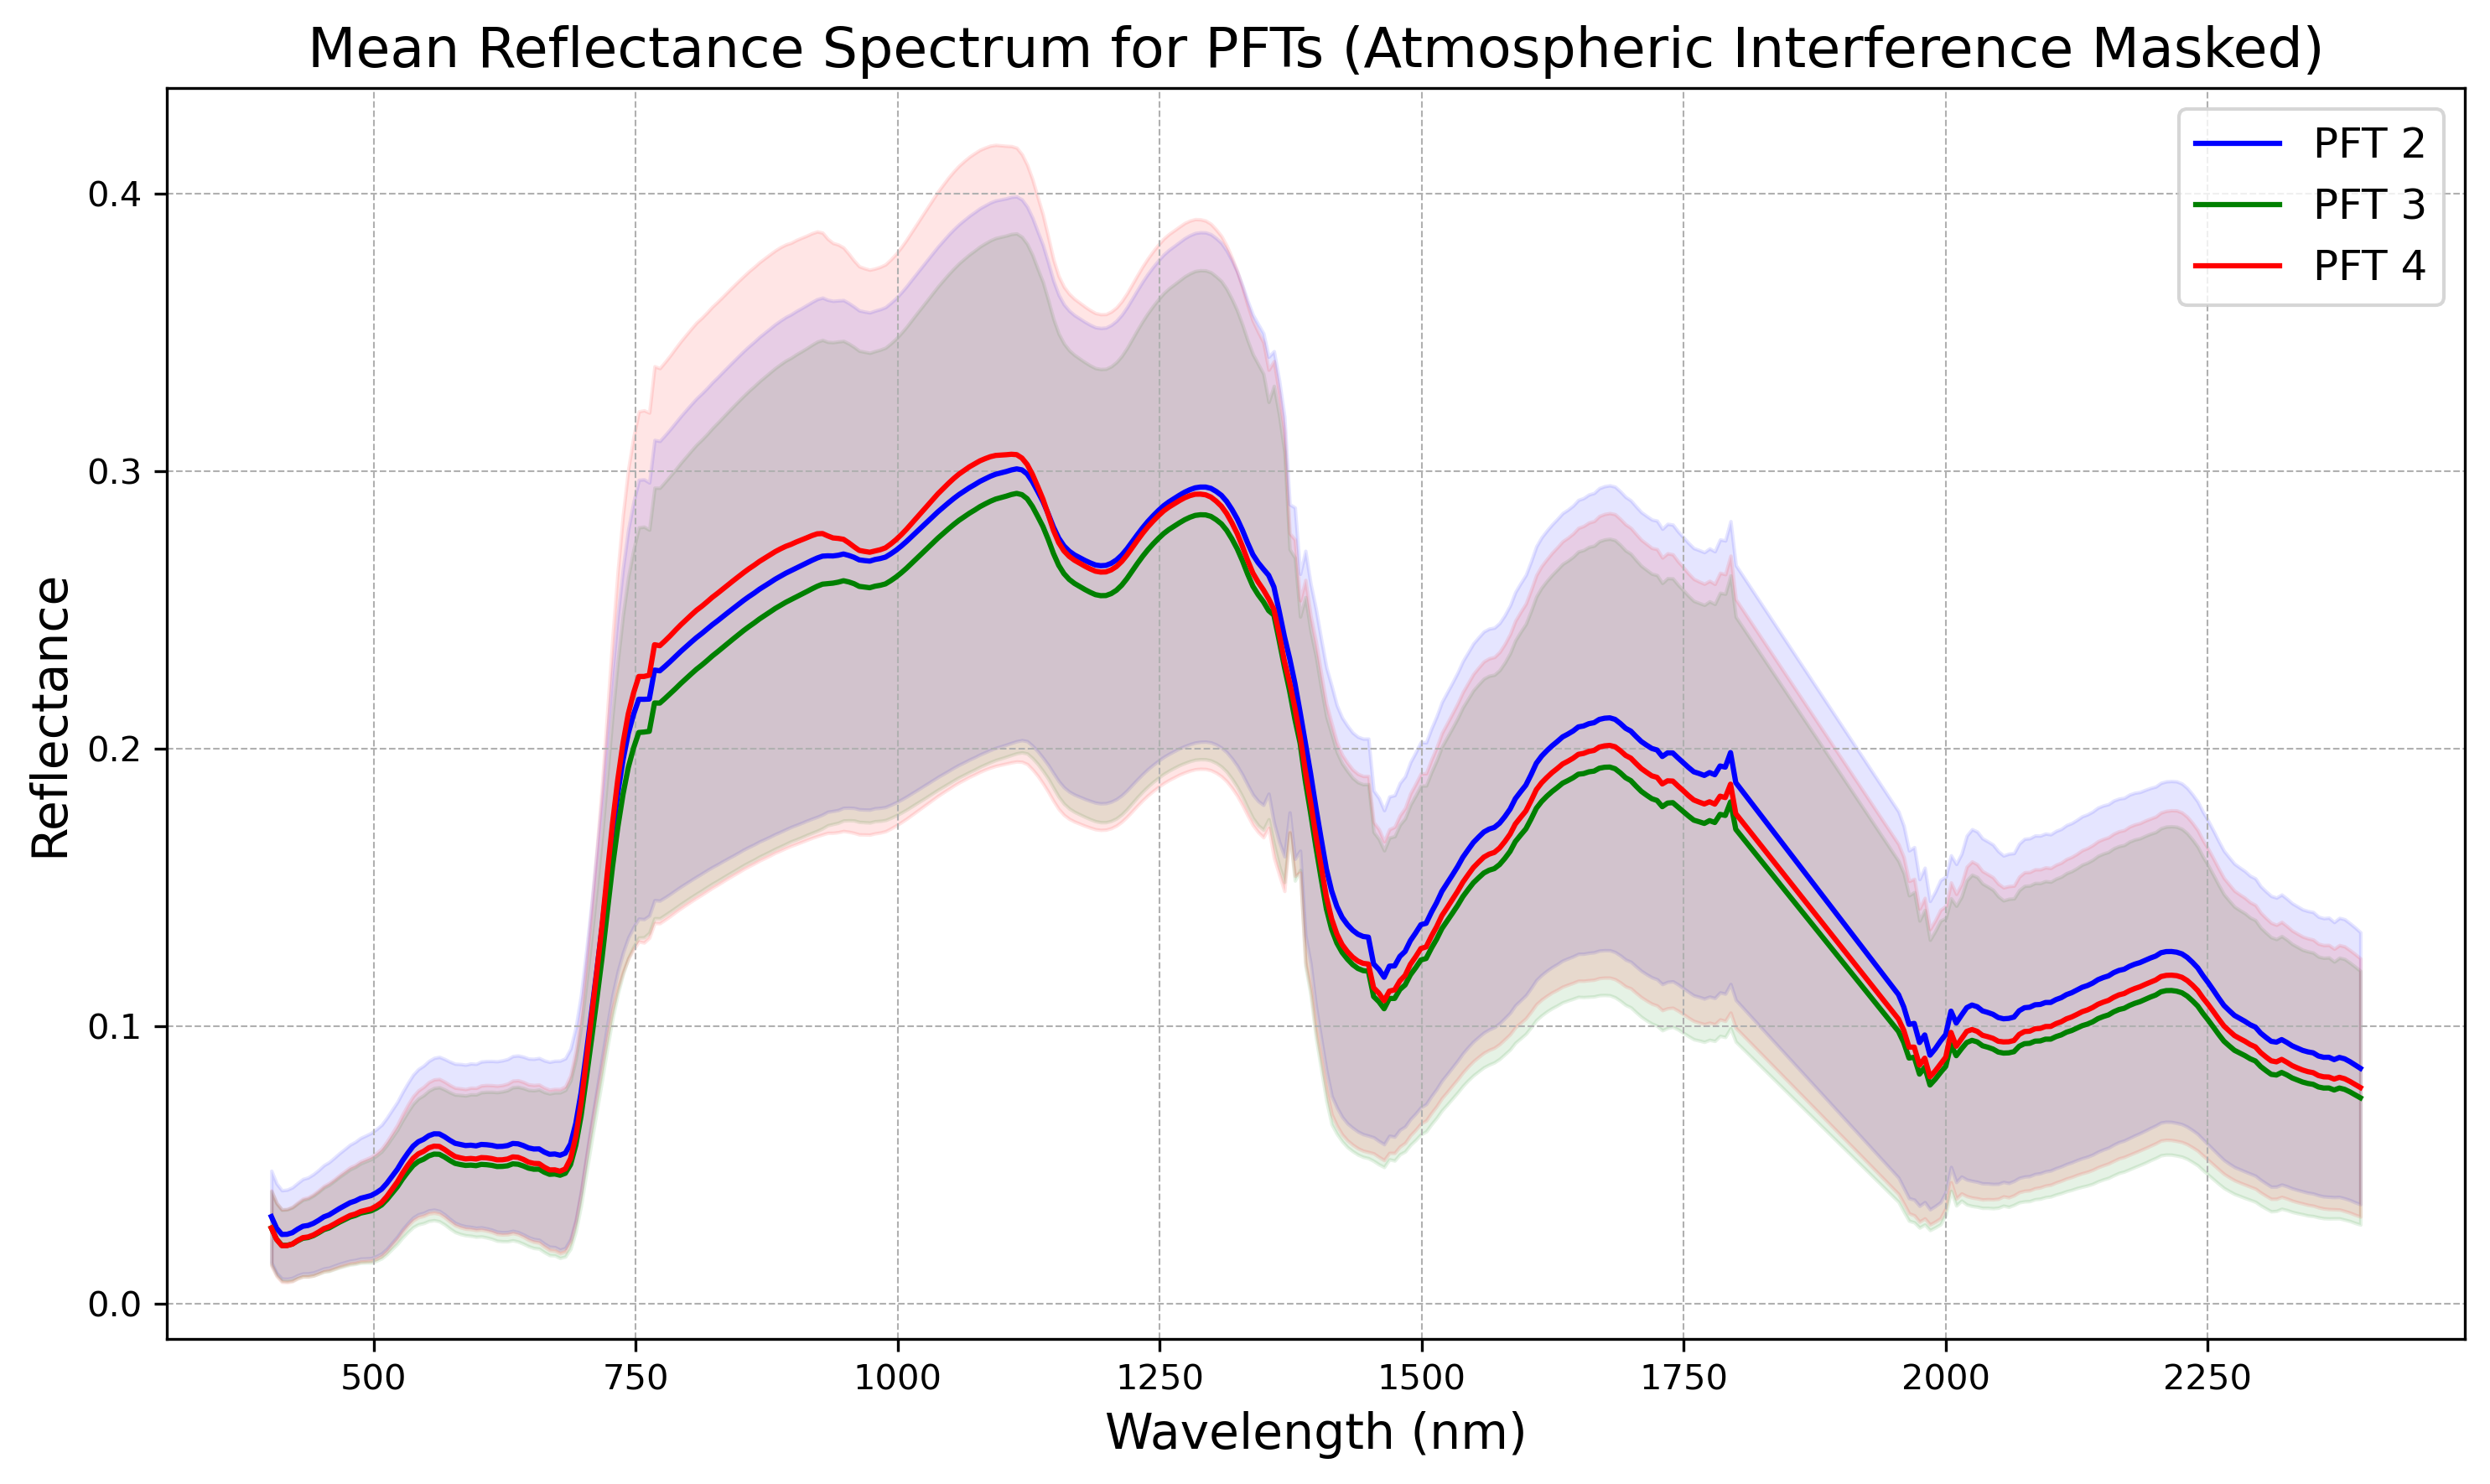

In [17]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the datasets
pft_ds = xr.open_dataset('/net/fluo/data3/data/FluoData1/students/renato/aviris_dangermond/California_Vegetation_WHRTYPE_Dangermond/output_latlon.nc')
dat = xr.open_dataset('/net/fluo/data3/data/FluoData1/students/renato/aviris_dangermond/aviris_dangermond_time_00/output_clipped_reduced.nc')

# Define PFT indices
pft_indices = [2, 3, 4]
colors = ['blue', 'green', 'red']  # Colors for each PFT
labels = ['PFT 1', 'PFT 2', 'PFT 3']  # Labels for each PFT

# Initialize a high-resolution figure
plt.figure(figsize=(10, 6), dpi=300)

# Define the wavelength ranges with atmospheric interference (example ranges)
#atmospheric_ranges = [(1340, 1440), (1800, 1950)]  # Replace with actual ranges
atmospheric_ranges = [(1800, 1950)]  # Replace with actual ranges


# Loop over each PFT index to mask, calculate the mean reflectance, and the confidence intervals
for pft_index, color, label in zip(pft_indices, colors, labels):
    # Create the mask for the current PFT
    pft_mask = pft_ds['Band1'].values == pft_index
    
    # Apply the mask directly to the hyperspectral data for each wavelength
    pft_reflectance = np.where(pft_mask, dat['reflectance'].values, np.nan)
    
    # Mask out the atmospheric interference wavelengths
    wavelengths = dat['wavelength'].values
    for r in atmospheric_ranges:
        atmospheric_mask = (wavelengths < r[0]) | (wavelengths > r[1])
        pft_reflectance = pft_reflectance[:, atmospheric_mask, :, :]
        wavelengths = wavelengths[atmospheric_mask]

    # Compute the mean reflectance while ignoring NaNs
    mean_reflectance = np.nanmean(pft_reflectance, axis=(0, 2, 3))
    
    # Compute the standard deviation and the 95% confidence interval
    std_deviation = np.nanstd(pft_reflectance, axis=(0, 2, 3))
    ci95 = std_deviation 

    # Plot the mean reflectance and the confidence interval shading
    plt.plot(wavelengths, mean_reflectance, label=label, color=color)
    plt.fill_between(wavelengths, mean_reflectance - ci95, mean_reflectance + ci95, color=color, alpha=0.1)

# Formatting the plot to be publication-quality
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('Reflectance', fontsize=14)
plt.title('Mean Reflectance Spectrum for PFTs (Atmospheric Interference Masked)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', ls='--', lw=0.5)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()

# Show the plot
plt.show()

# Save the plot with high resolution
# Uncomment the line below to save the figure to a file
# plt.savefig('/path/to/save/publication_quality_plot.png', dpi=300)


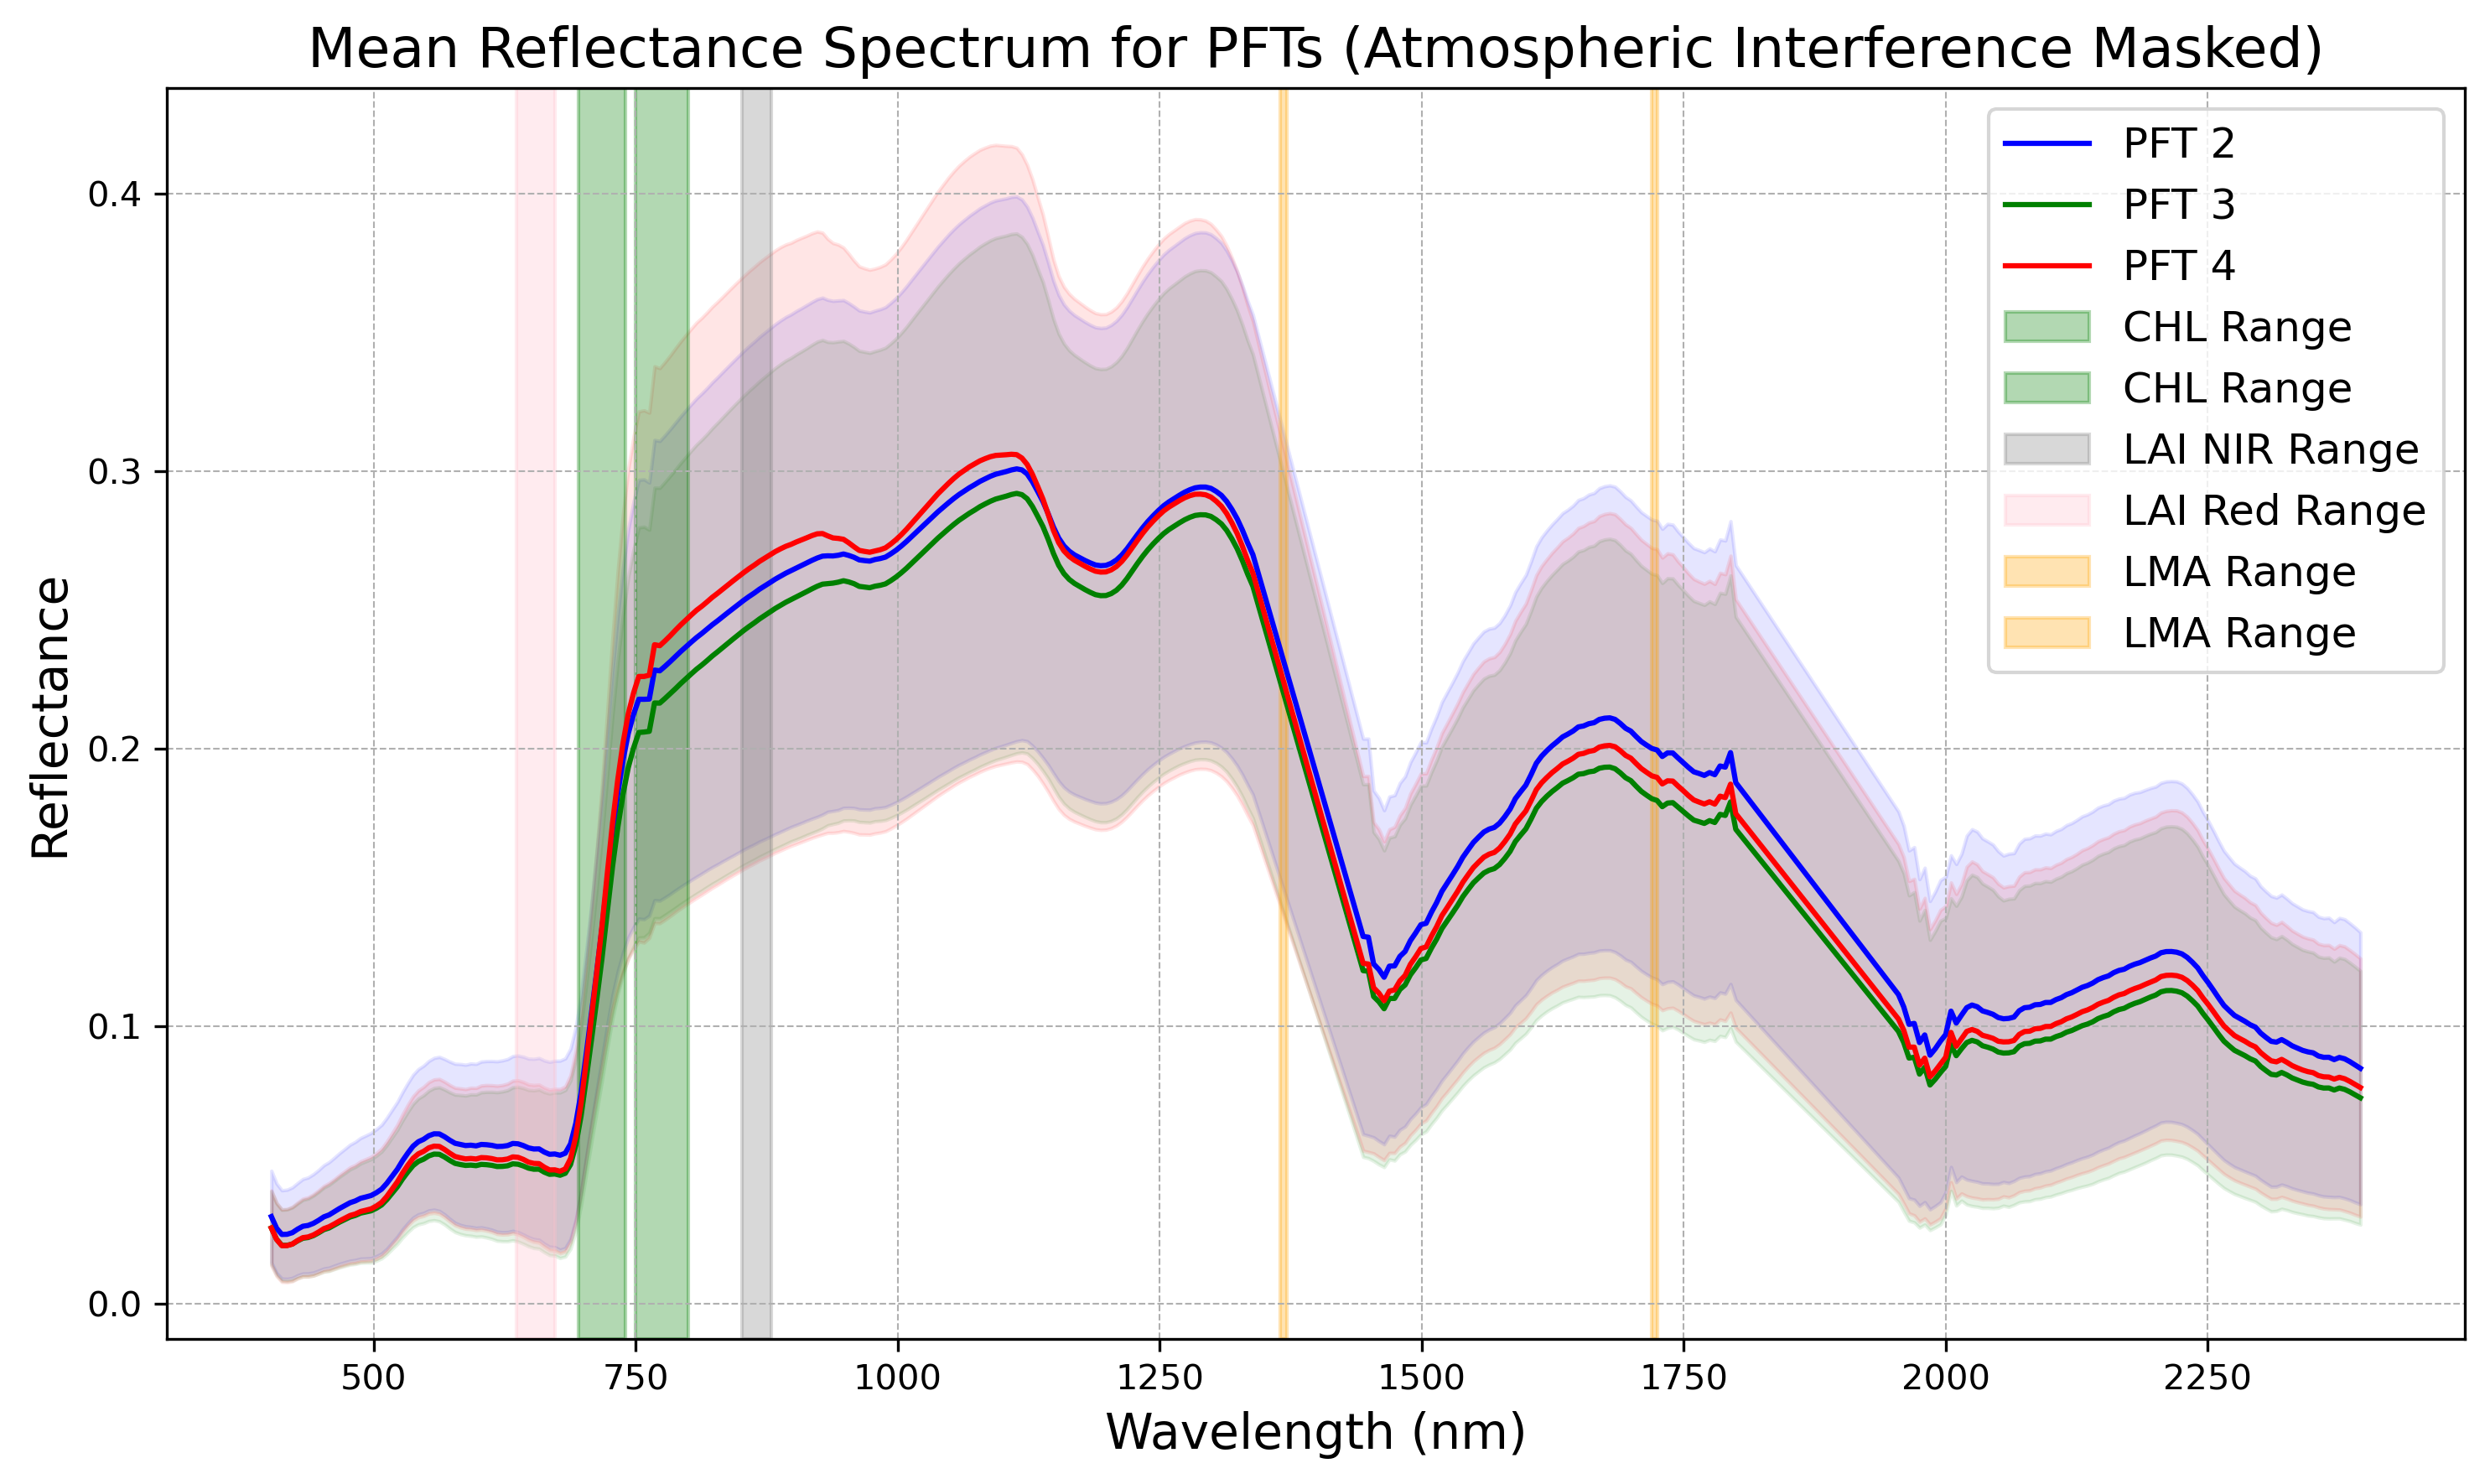

In [22]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the datasets
pft_ds = xr.open_dataset('/net/fluo/data3/data/FluoData1/students/renato/aviris_dangermond/California_Vegetation_WHRTYPE_Dangermond/output_latlon.nc')
dat = xr.open_dataset('/net/fluo/data3/data/FluoData1/students/renato/aviris_dangermond/aviris_dangermond_time_00/output_clipped_reduced.nc')

# Define PFT indices and corresponding plot properties
pft_indices = [2, 3, 4]
colors = ['blue', 'green', 'red']
labels = ['PFT 2', 'PFT 3', 'PFT 4']

# Initialize a high-resolution figure
plt.figure(figsize=(10, 6), dpi=300)

# Define atmospheric interference ranges to be excluded from the analysis
atmospheric_ranges = [(1800, 1950)]

# Spectral ranges for trait derivation
lai_range_nir = (851, 879)
lai_range_red = (636, 673)
chl_ranges = [(695, 740), (750, 800)]
lma_ranges = [(1365, 1371), (1719, 1725)]

# Process each PFT
for pft_index, color, label in zip(pft_indices, colors, labels):
    # Apply the mask for the current PFT
    pft_mask = pft_ds['Band1'].values == pft_index
    pft_reflectance = np.where(pft_mask, dat['reflectance'].values, np.nan)

    # Mask out the atmospheric interference wavelengths
    wavelengths = dat['wavelength'].values
    mask = np.ones_like(wavelengths, dtype=bool)
    for start, end in atmospheric_ranges:
        mask &= ~((wavelengths >= start) & (wavelengths <= end))
    wavelengths = wavelengths[mask]
    pft_reflectance = pft_reflectance[:, mask, :, :]

    # Calculate mean reflectance while ignoring NaNs
    mean_reflectance = np.nanmean(pft_reflectance, axis=(0, 2, 3))
    std_deviation = np.nanstd(pft_reflectance, axis=(0, 2, 3))
    ci95 = std_deviation

    # Plot mean reflectance and confidence interval
    plt.plot(wavelengths, mean_reflectance, label=label, color=color)
    plt.fill_between(wavelengths, mean_reflectance - ci95, mean_reflectance + ci95, color=color, alpha=0.1)

# Add vertical bars for spectral ranges used in trait calculations
for chl_range in chl_ranges:
    plt.axvspan(chl_range[0], chl_range[1], color='green', alpha=0.3, label='CHL Range')
plt.axvspan(lai_range_nir[0], lai_range_nir[1], color='grey', alpha=0.3, label='LAI NIR Range')
plt.axvspan(lai_range_red[0], lai_range_red[1], color='pink', alpha=0.3, label='LAI Red Range')
for lma_range in lma_ranges:
    plt.axvspan(lma_range[0], lma_range[1], color='orange', alpha=0.3, label='LMA Range')

# Enhance the plot to be publication-quality
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('Reflectance', fontsize=14)
plt.title('Mean Reflectance Spectrum for PFTs (Atmospheric Interference Masked)', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, which='both', ls='--', lw=0.5)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()

# Display the plot
plt.show()

# Save the plot with high resolution
# Uncomment to save: plt.savefig('/path/to/save/publication_quality_plot.png', dpi=300)


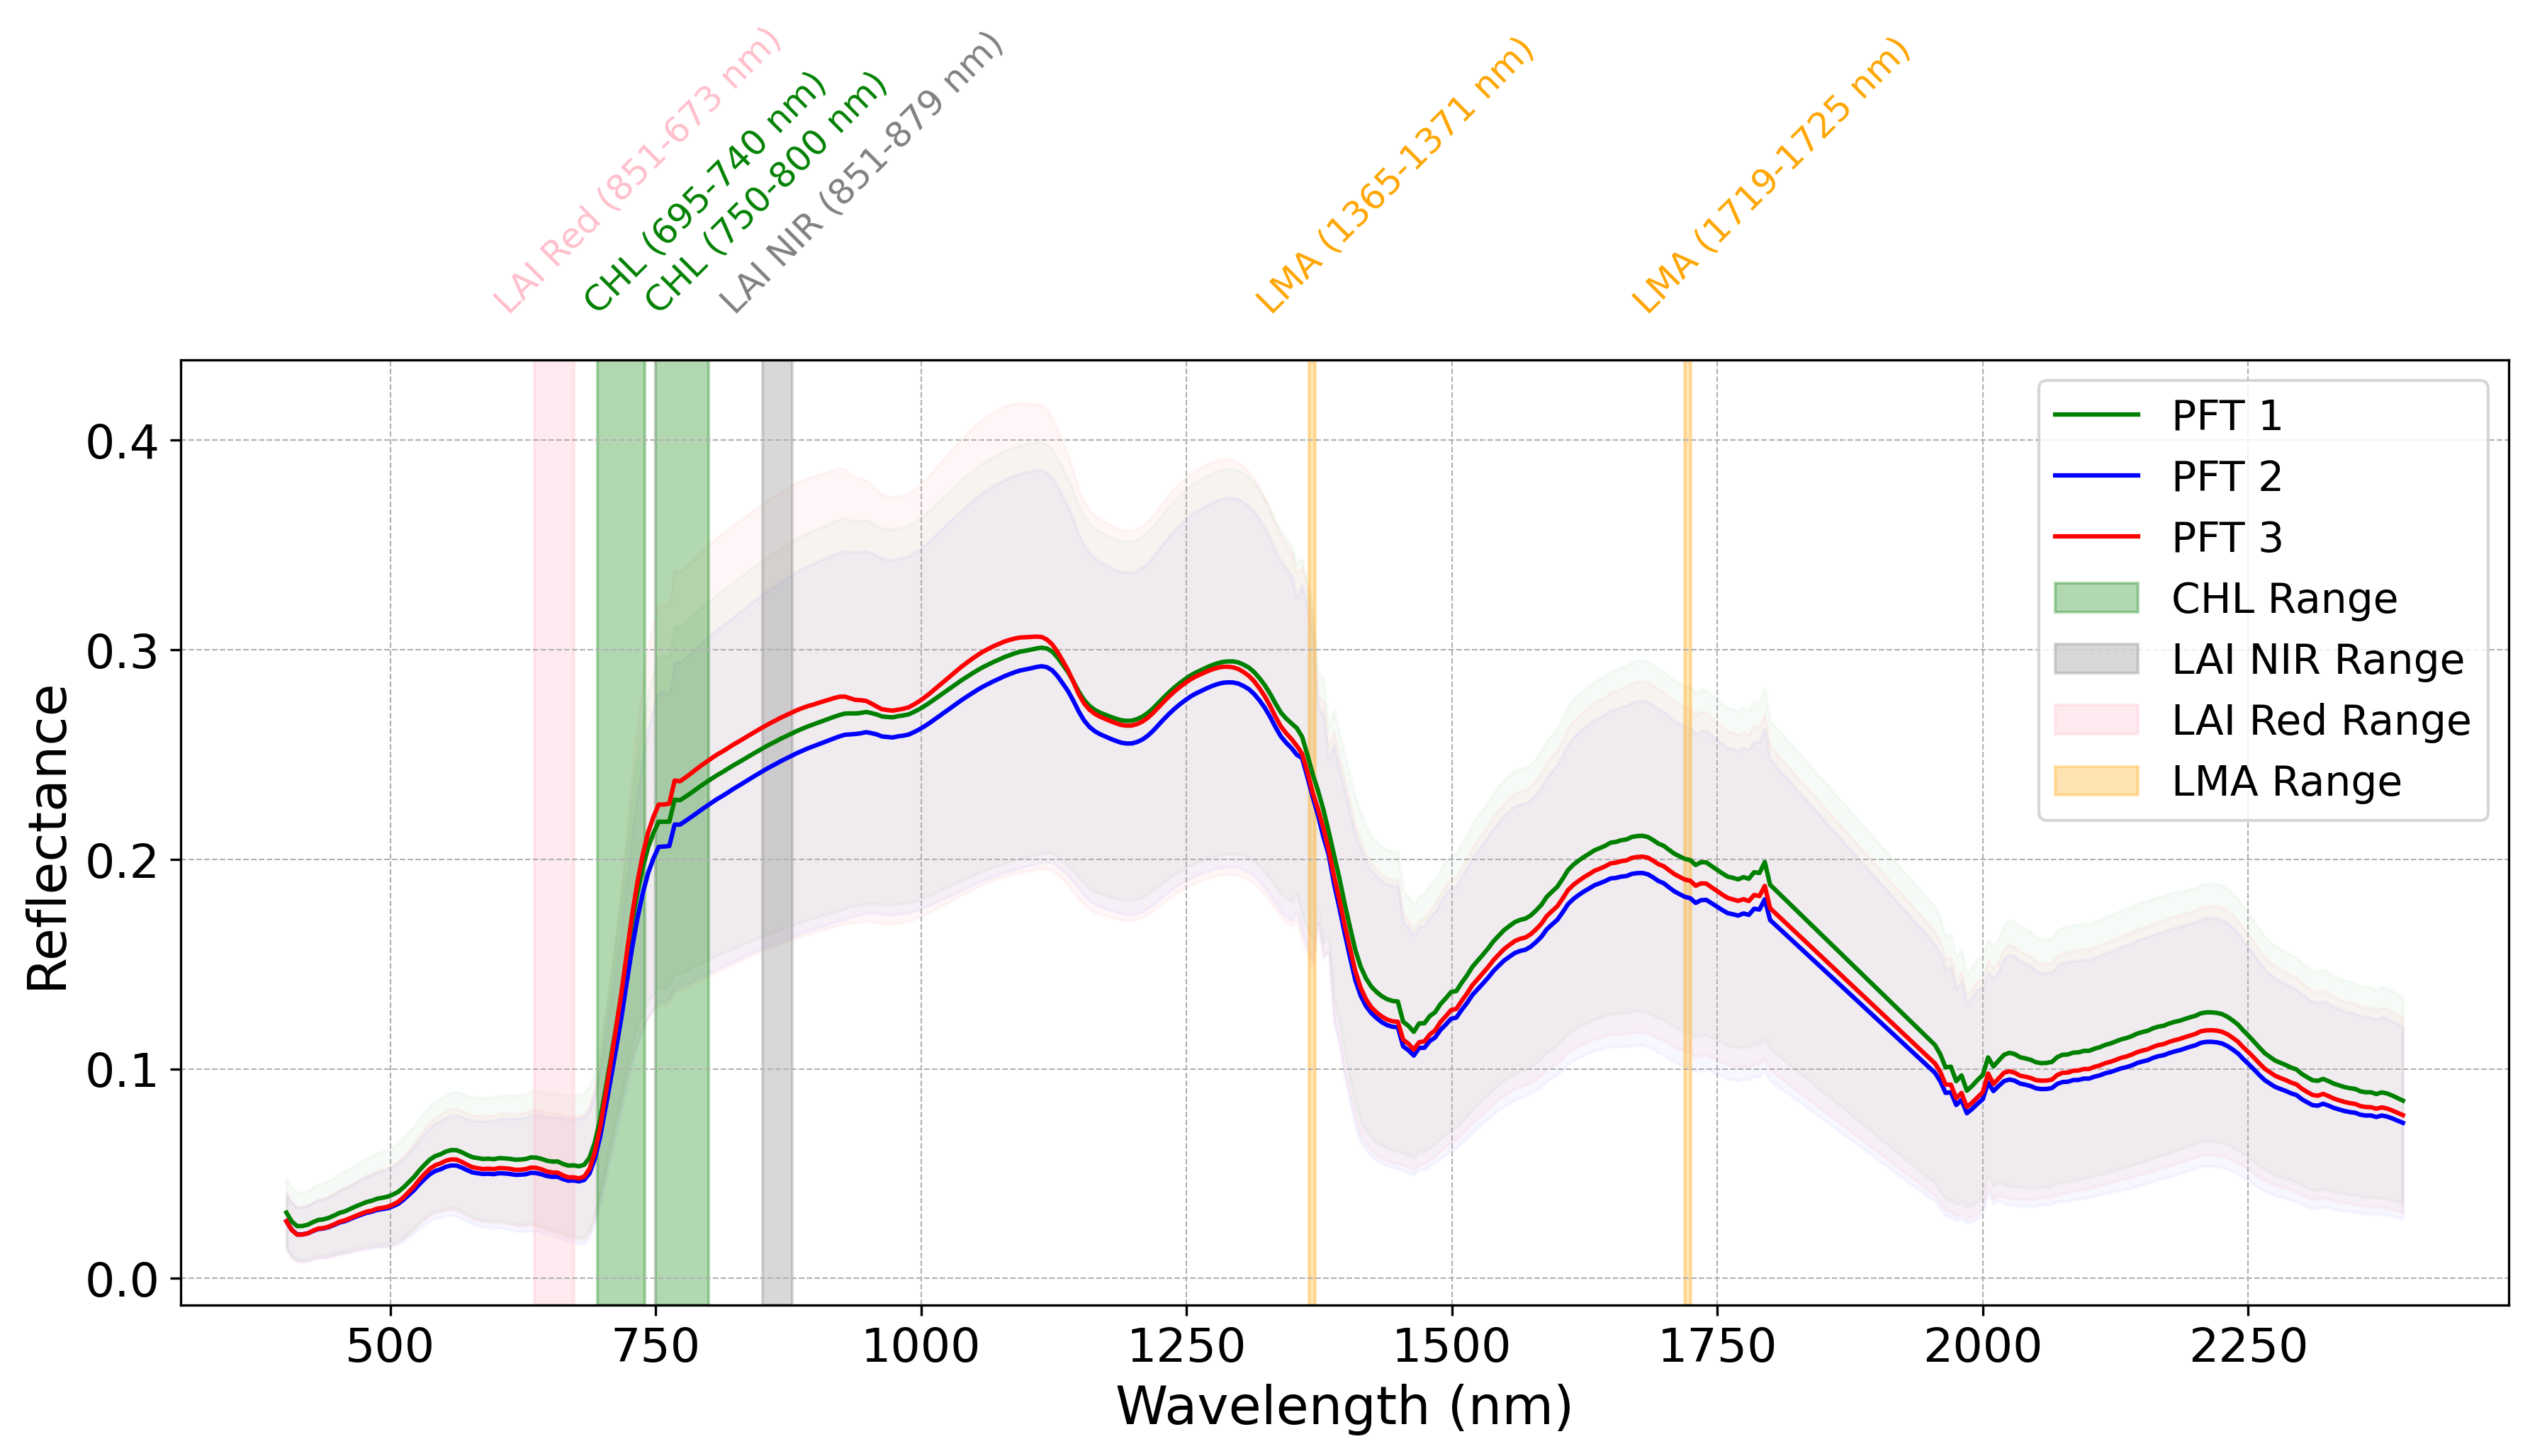

In [53]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the datasets
pft_ds = xr.open_dataset('/net/fluo/data3/data/FluoData1/students/renato/aviris_dangermond/California_Vegetation_WHRTYPE_Dangermond/output_latlon.nc')
dat = xr.open_dataset('/net/fluo/data3/data/FluoData1/students/renato/aviris_dangermond/aviris_dangermond_time_00/output_clipped_reduced.nc')

# Define PFT indices and corresponding plot properties
pft_indices = [2, 3, 4]
colors = ['green', 'blue', 'red']
labels = ['PFT 1', 'PFT 2', 'PFT 3']

# Initialize a high-resolution figure
plt.figure(figsize=(12, 7), dpi=300)

# Define atmospheric interference ranges to be excluded from the analysis
atmospheric_ranges = [(1800, 1950)]

# Spectral ranges for trait derivation
lai_range_nir = (851, 879)
lai_range_red = (636, 673)
chl_ranges = [(695, 740), (750, 800)]
lma_ranges = [(1365, 1371), (1719, 1725)]

# Process each PFT
for pft_index, color, label in zip(pft_indices, colors, labels):
    # Apply the mask for the current PFT
    pft_mask = pft_ds['Band1'].values == pft_index
    pft_reflectance = np.where(pft_mask, dat['reflectance'].values, np.nan)

    # Mask out the atmospheric interference wavelengths
    wavelengths = dat['wavelength'].values
    mask = np.ones_like(wavelengths, dtype=bool)
    for start, end in atmospheric_ranges:
        mask &= ~((wavelengths >= start) & (wavelengths <= end))
    wavelengths = wavelengths[mask]
    pft_reflectance = pft_reflectance[:, mask, :, :]

    # Calculate mean reflectance while ignoring NaNs
    mean_reflectance = np.nanmean(pft_reflectance, axis=(0, 2, 3))
    std_deviation = np.nanstd(pft_reflectance, axis=(0, 2, 3))
    ci95 = std_deviation
    #ci95 = 1.95 * std_deviation / np.sqrt(np.sum(~np.isnan(pft_reflectance), axis=(0, 2, 3)))
    #ci95 = std_deviation / np.sqrt(np.sum(~np.isnan(pft_reflectance), axis=(0, 2, 3)))


    # Plot mean reflectance and confidence interval
    plt.plot(wavelengths, mean_reflectance, label=label, color=color)
    plt.fill_between(wavelengths, mean_reflectance - ci95, mean_reflectance + ci95, color=color, alpha=0.03)

# Add vertical bars for spectral ranges used in trait calculations
for chl_range in chl_ranges:
    if chl_range == chl_ranges[0]:
        plt.axvspan(chl_range[0], chl_range[1], color='green', alpha=0.3, label='CHL Range')
    else:
        plt.axvspan(chl_range[0], chl_range[1], color='green', alpha=0.3)
plt.axvspan(lai_range_nir[0], lai_range_nir[1], color='grey', alpha=0.3, label='LAI NIR Range')
plt.axvspan(lai_range_red[0], lai_range_red[1], color='pink', alpha=0.3, label='LAI Red Range')
for lma_range in lma_ranges:
    if lma_range == lma_ranges[0]:
        plt.axvspan(lma_range[0], lma_range[1], color='orange', alpha=0.3, label='LMA Range')
    else:
        plt.axvspan(lma_range[0], lma_range[1], color='orange', alpha=0.3)
# Formatting for publication-quality
plt.xlabel('Wavelength (nm)', fontsize=18)
plt.ylabel('Reflectance', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, which='both', ls='--', lw=0.5)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend(fontsize=14, loc='upper right')

# Annotations for wavelength bands
for chl_range in chl_ranges:
    plt.annotate(f'CHL ({chl_range[0]}-{chl_range[1]} nm)', xy=(80 + (chl_range[0]+chl_range[1])/2, 1.05), xycoords=('data', 'axes fraction'), color='green', rotation=45, ha='center', fontsize=12)
plt.annotate(f'LAI NIR ({lai_range_nir[0]}-{lai_range_nir[1]} nm)', xy=(80+(lai_range_nir[0]+lai_range_nir[1])/2, 1.05), xycoords=('data', 'axes fraction'), color='grey', rotation=45, ha='center', fontsize=12)
plt.annotate(f'LAI Red ({lai_range_nir[0]}-{lai_range_red[1]} nm)', xy=(80+(lai_range_red[0]+lai_range_red[1])/2, 1.05), xycoords=('data', 'axes fraction'), color='pink', rotation=45, ha='center', fontsize=12)
for lma_range in lma_ranges:
    plt.annotate(f'LMA ({lma_range[0]}-{lma_range[1]} nm)', xy=(80+(lma_range[0]+lma_range[1])/2, 1.05), xycoords=('data', 'axes fraction'), color='orange', rotation=45, ha='center', fontsize=12)

plt.tight_layout()

# Display the plot
#plt.show()

# Save the plot with high resolution
plt.savefig('/net/fluo/data3/data/FluoData1/students/renato/aviris_dangermond/figures/hyperspectral_traits.png', dpi=600)


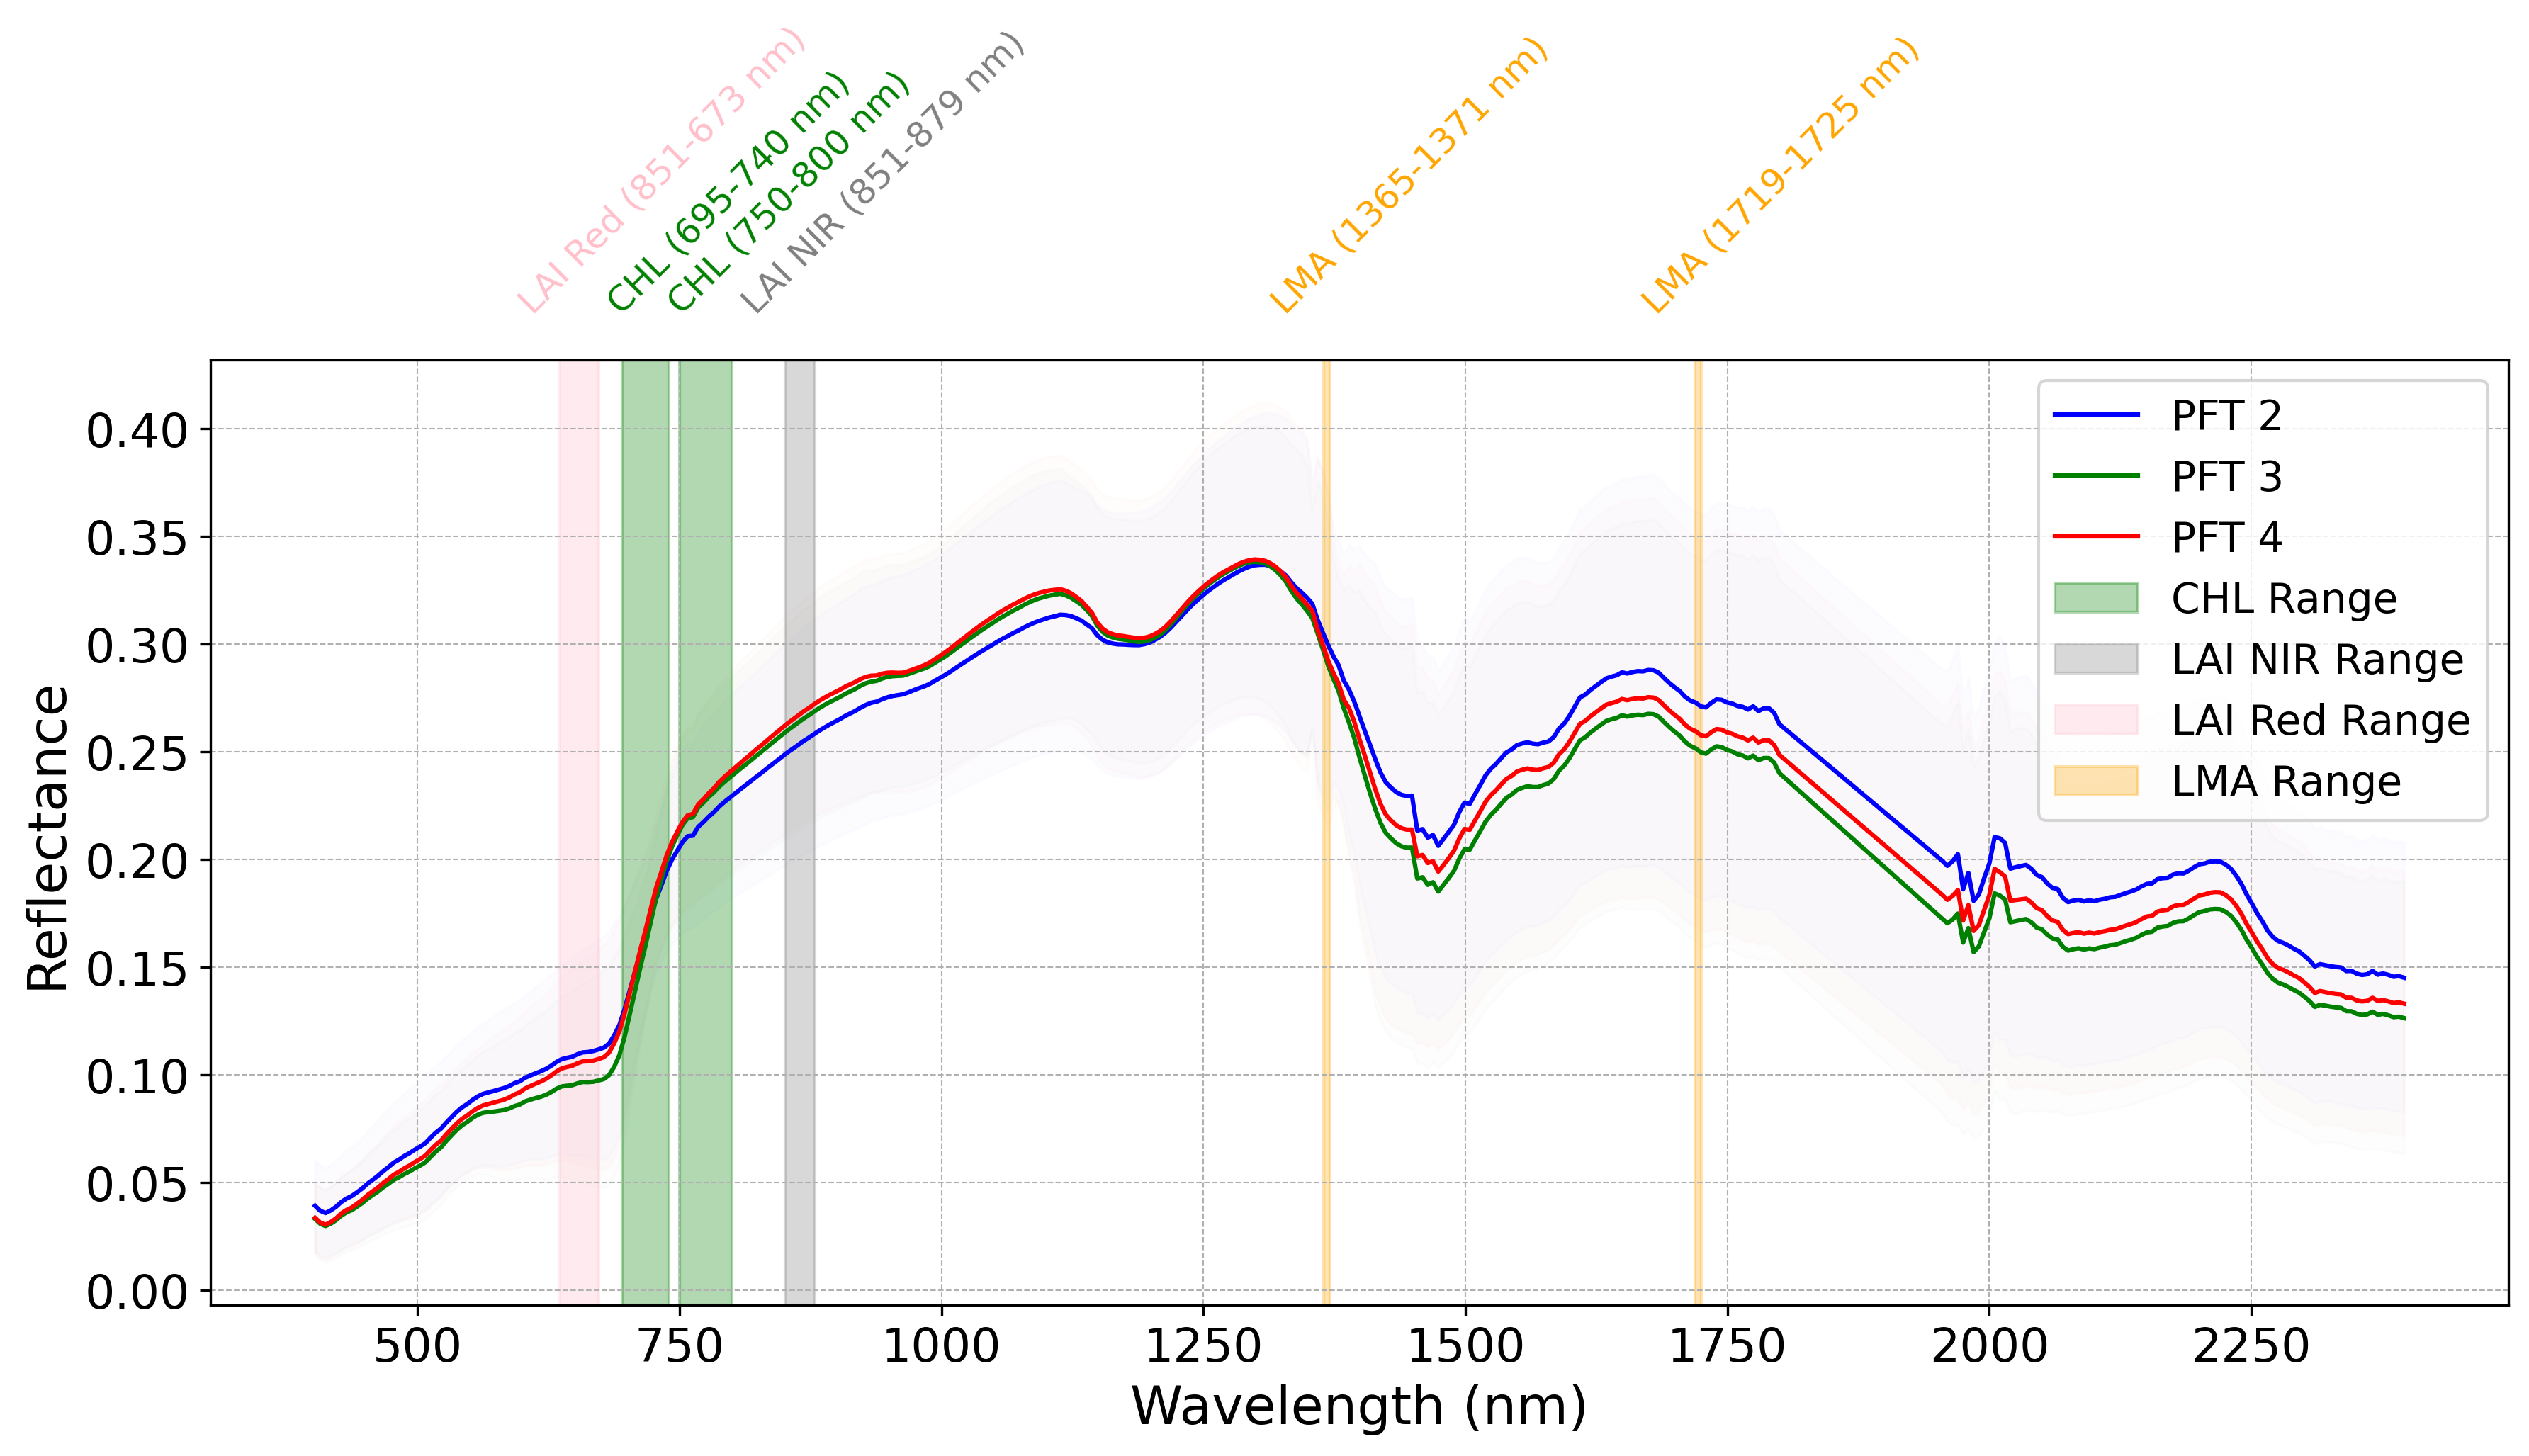

<Figure size 640x480 with 0 Axes>

In [49]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the datasets
pft_ds = xr.open_dataset('/net/fluo/data3/data/FluoData1/students/renato/aviris_dangermond/California_Vegetation_WHRTYPE_Dangermond/output_latlon.nc')
dat = xr.open_dataset('/net/fluo/data3/data/FluoData1/students/renato/aviris_dangermond/aviris_dangermond_time_12/output_clipped_reduced.nc')

# Define PFT indices and corresponding plot properties
pft_indices = [2, 3, 4]
colors = ['blue', 'green', 'red']
labels = ['PFT 2', 'PFT 3', 'PFT 4']

# Initialize a high-resolution figure
plt.figure(figsize=(12, 7), dpi=300)

# Define atmospheric interference ranges to be excluded from the analysis
atmospheric_ranges = [(1800, 1950)]

# Spectral ranges for trait derivation
lai_range_nir = (851, 879)
lai_range_red = (636, 673)
chl_ranges = [(695, 740), (750, 800)]
lma_ranges = [(1365, 1371), (1719, 1725)]

# Process each PFT
for pft_index, color, label in zip(pft_indices, colors, labels):
    # Apply the mask for the current PFT
    pft_mask = pft_ds['Band1'].values == pft_index
    pft_reflectance = np.where(pft_mask, dat['reflectance'].values, np.nan)

    # Mask out the atmospheric interference wavelengths
    wavelengths = dat['wavelength'].values
    mask = np.ones_like(wavelengths, dtype=bool)
    for start, end in atmospheric_ranges:
        mask &= ~((wavelengths >= start) & (wavelengths <= end))
    wavelengths = wavelengths[mask]
    pft_reflectance = pft_reflectance[:, mask, :, :]

    # Calculate mean reflectance while ignoring NaNs
    mean_reflectance = np.nanmean(pft_reflectance, axis=(0, 2, 3))
    std_deviation = np.nanstd(pft_reflectance, axis=(0, 2, 3))
    ci95 = std_deviation

    # Plot mean reflectance and confidence interval
    plt.plot(wavelengths, mean_reflectance, label=label, color=color)
    plt.fill_between(wavelengths, mean_reflectance - ci95, mean_reflectance + ci95, color=color, alpha=0.01)

# Add vertical bars for spectral ranges used in trait calculations
for chl_range in chl_ranges:
    if chl_range == chl_ranges[0]:
        plt.axvspan(chl_range[0], chl_range[1], color='green', alpha=0.3, label='CHL Range')
    else:
        plt.axvspan(chl_range[0], chl_range[1], color='green', alpha=0.3)
plt.axvspan(lai_range_nir[0], lai_range_nir[1], color='grey', alpha=0.3, label='LAI NIR Range')
plt.axvspan(lai_range_red[0], lai_range_red[1], color='pink', alpha=0.3, label='LAI Red Range')
for lma_range in lma_ranges:
    if lma_range == lma_ranges[0]:
        plt.axvspan(lma_range[0], lma_range[1], color='orange', alpha=0.3, label='LMA Range')
    else:
        plt.axvspan(lma_range[0], lma_range[1], color='orange', alpha=0.3)
# Formatting for publication-quality
plt.xlabel('Wavelength (nm)', fontsize=18)
plt.ylabel('Reflectance', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, which='both', ls='--', lw=0.5)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend(fontsize=14, loc='upper right')

# Annotations for wavelength bands
for chl_range in chl_ranges:
    plt.annotate(f'CHL ({chl_range[0]}-{chl_range[1]} nm)', xy=(80 + (chl_range[0]+chl_range[1])/2, 1.05), xycoords=('data', 'axes fraction'), color='green', rotation=45, ha='center', fontsize=12)
plt.annotate(f'LAI NIR ({lai_range_nir[0]}-{lai_range_nir[1]} nm)', xy=(80+(lai_range_nir[0]+lai_range_nir[1])/2, 1.05), xycoords=('data', 'axes fraction'), color='grey', rotation=45, ha='center', fontsize=12)
plt.annotate(f'LAI Red ({lai_range_nir[0]}-{lai_range_red[1]} nm)', xy=(80+(lai_range_red[0]+lai_range_red[1])/2, 1.05), xycoords=('data', 'axes fraction'), color='pink', rotation=45, ha='center', fontsize=12)
for lma_range in lma_ranges:
    plt.annotate(f'LMA ({lma_range[0]}-{lma_range[1]} nm)', xy=(80+(lma_range[0]+lma_range[1])/2, 1.05), xycoords=('data', 'axes fraction'), color='orange', rotation=45, ha='center', fontsize=12)

plt.tight_layout()

# Display the plot
plt.show()

# Save the plot with high resolution
plt.savefig('/net/fluo/data3/data/FluoData1/students/renato/aviris_dangermond/figures/hyperspectral_traits_time_12.png', dpi=600)
